In [1]:
%pylab inline
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb

# Multivariate Analysis 

**Source signal**: $Z'$ vector boson. $M_Z'$  = __2000 $GeV$__

In [3]:
# Import random sample from ROOT
signal = pd.read_csv('randomSampleNoCuts/joined_signal_2p0TeV.root.csv')
signal.head()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
0,1,674.657,503.833,589.245,85.4122,10.88430,9.88161,10.383000,0.501347,682.140,...,45.18250,2359.71,1337.060,1022.650,-4.68152,-2.41415,2.26738,1.061410,0.299421,-0.761990
1,1,429.392,162.025,295.709,133.6840,69.89640,65.82960,67.863000,2.033390,1159.050,...,8.52032,1876.35,1318.520,557.829,-5.84944,-2.72409,3.12535,-0.851809,-1.227380,-0.375571
2,1,358.122,295.368,326.745,31.3773,19.31580,16.05020,17.683000,1.632820,442.774,...,10.48480,2330.16,1490.470,839.684,4.60246,2.07199,-2.53047,-1.071290,0.501598,1.572880
3,1,382.153,188.567,285.360,96.7933,7.13342,3.84966,5.491540,1.641880,469.927,...,46.69540,2702.70,988.631,1714.070,-4.74779,-1.97539,2.77240,1.998320,1.686310,-0.312003
4,1,382.410,258.987,320.699,61.7115,2.47946,-2.47944,0.000008,2.479450,480.478,...,9.93221,2160.60,1396.190,764.416,4.34596,1.12300,-3.22296,3.037770,0.289798,-2.747970


Let's see some descriptive statistics from raw data 

In [4]:
signal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,...,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.500315,279.828719,110.366911,195.097812,84.730905,10.519248,3.056637,6.787943,3.731306,548.064176,...,9.428369,1169.301634,649.470714,519.830878,0.003309,-0.036064,-0.039373,-0.008713,0.001560,0.010274
std,0.500157,302.517101,148.997802,209.246014,114.343980,15.120600,12.553644,11.163983,8.275202,522.769423,...,10.270012,1102.417631,674.510374,600.639768,4.038917,1.838045,2.425995,2.578530,1.822353,1.823866
min,0.000000,17.386300,0.013708,8.708890,7.543480,-0.000024,-146.371000,-0.000026,-0.000019,21.659900,...,-0.000013,20.304800,9.731070,8.935930,-7.593740,-4.710270,-4.892910,-6.120490,-3.135710,-3.138040
25%,0.000000,60.512300,13.116600,39.131000,18.155400,3.262900,-0.797849,1.372640,1.032260,120.788000,...,2.557980,165.928000,82.720300,42.605000,-3.882510,-1.646480,-2.253170,-1.861590,-1.589440,-1.522710
50%,1.000000,146.926000,40.708100,101.716000,37.896500,6.153890,1.182180,3.398920,2.002710,371.429000,...,5.813930,854.523000,447.570000,281.932000,0.295673,0.027543,-0.034558,0.016409,-0.017392,-0.001908
75%,1.000000,423.816000,154.706000,300.083000,107.556000,12.221700,4.744790,8.060150,3.877180,864.124000,...,12.725200,1991.920000,1051.510000,805.984000,3.901560,1.579230,2.246120,1.897670,1.647160,1.593290
max,1.000000,2530.560000,914.019000,1635.220000,1124.590000,250.382000,150.153000,156.786000,198.377000,3179.850000,...,79.342900,5498.690000,4403.320000,3249.830000,7.509690,4.465500,4.990630,6.059940,3.129400,3.137270


In [5]:
# Which variables we have
signal.columns

Index([u'type', u'Tau_PT_sum', u'Tau_PT_dif', u'Tau_PT_1', u'Tau_PT_2',
       u'Tau_Mass_sum', u'Tau_Mass_dif', u'Tau_Mass_1', u'Tau_Mass_2',
       u'Tau_Ener_sum', u'Tau_Ener_1', u'Tau_Ener_2', u'Tau_Eta_dif',
       u'Tau_Eta_1', u'Tau_Eta_2', u'Tau_Phi_dif', u'Tau_Phi_1', u'Tau_Phi_2',
       u'Miss_MET', u'Jet_PT_sum', u'Jet_PT_dif', u'Jet_PT_1', u'Jet_PT_2',
       u'Jet_Mass_sum', u'Jet_Mass_dif', u'Jet_Mass_1', u'Jet_Mass_2',
       u'Jet_Ener_sum', u'Jet_Ener_1', u'Jet_Ener_2', u'Jet_Eta_dif',
       u'Jet_Eta_1', u'Jet_Eta_2', u'Jet_Phi_dif', u'Jet_Phi_1', u'Jet_Phi_2'],
      dtype='object')

As a first approach to new data, it's useful to see how their variables are distributed. Futhermore, as a *supervised learning problem*, we know the target varaible, so lets use it:

*These graphs were generated with ROOT*

In [6]:
from IPython.display import IFrame
IFrame("./randomSampleNoCuts/histograms_signal_2p0TeV.rootByType_1.pdf",width=850,height=560)

In [8]:
IFrame("./randomSampleNoCuts/histograms_signal_2p0TeV.rootByType_2.pdf",width=850,height=560)

In [9]:
IFrame("./randomSampleNoCuts/histograms_signal_2p0TeV.rootByType_3.pdf",width=850,height=560)

From the previous images, we can see that some variables could have higher predictable power to discriminate between **signal** and **background** if we take the absolute value of them:
     
    - Tau_Mass_dif, Jet_Mass_dif
    - Jet_PT_dif, Tau_PT_dif
    - Jet_Eta_dif, Jet_Eta_1, Jet_Eta_1
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2    
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2

However, some of them (and others) seems don't have enough classification power:
   
    - Jet_PT_dif, Tau_PT_dif  
    - Tau_Mass_dif, Jet_Mass_dif
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Miss_Eta, Miss_Phi
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2
    
For now, let's take the absolute value:

In [10]:
signal[['Tau_Mass_dif','Jet_Mass_dif']] = signal[['Tau_Mass_dif','Jet_Mass_dif']].abs()
signal[['Jet_PT_dif','Tau_PT_dif']] = signal[['Jet_PT_dif','Tau_PT_dif']].abs()
signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']] = signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']].abs()
signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']] = signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']].abs()
signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']] = signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']].abs()
signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']] = signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']].abs()

In [11]:
# Divide the data between dependent and independent variables
Xsignal = signal.drop(['type'],axis=1)
Ysignal = signal['type']

# Exploraty Analysis

### Pre-Pre-Processing 

The objective of the following sections is to explorate our data and find useful insigths that could gives us a flavor of the sense of the data. As the previous graphs shows, there are some variables that possiblely would not have importance in the prediction of the target variable - **type** of event = (**Signal**, **Background**) -, so the posterior analysis should confirm this of them. 

This process called *feature selection* is fundamental for the success of the model implementation. However, to avoid bias of *feature selection* we must divide the data in two parts: trainning-test set and validation set. To read more about the bias on *feature selection* see: http://www.pnas.org/content/99/10/6562.full.pdf


In [12]:
from sklearn.cross_validation import train_test_split
X_train_test, X_validation, Y_train_test, Y_validation = train_test_split(Xsignal,Ysignal,test_size=.2)
train_test = pd.concat([Y_train_test,X_train_test],axis=1)
X_validation.describe()

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,Tau_Ener_1,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,318.000000,318.000000,318.000000,318.000000,318.000000,3.180000e+02,318.000000,318.000000,318.000000,318.000000,...,3.180000e+02,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,288.936624,111.963837,200.450233,88.486393,10.983084,5.424433e+00,7.052385,3.930701,573.820995,393.471025,...,9.585249e+00,1198.540447,651.599478,546.940926,3.703624,1.576084,-0.020394,2.078862,1.567327,1.658945
std,308.687380,149.874804,215.066189,112.346457,14.769160,1.058990e+01,12.010939,5.544841,539.392124,400.975840,...,1.042723e+01,1112.583687,676.982897,637.300331,1.433884,0.922126,2.403158,1.494796,0.903707,0.889067
min,19.354300,0.013708,10.673500,7.607540,-0.000024,1.192090e-07,-0.000026,-0.000008,24.289600,12.658700,...,-4.129530e-07,21.441300,9.731070,9.059170,0.256265,0.049496,-4.794050,0.010372,0.001260,0.018450
25%,60.276075,10.852075,37.912350,18.764750,3.194235,9.216490e-01,1.258667,1.114348,107.312250,63.490275,...,2.448338e+00,172.906250,76.582925,44.150250,2.792655,0.819837,-2.151400,0.799826,0.802866,0.942886
50%,138.503000,37.276750,93.012050,39.845300,5.931150,2.445990e+00,3.216690,2.255970,377.004500,242.044500,...,5.633090e+00,886.235000,470.978500,260.191000,3.891075,1.568435,-0.009343,1.859280,1.562225,1.573725
75%,438.139750,175.469000,314.215250,115.352250,12.639675,6.059058e+00,8.432802,4.111535,954.145500,656.932750,...,1.250065e+01,2079.497500,1004.821250,842.724750,4.490563,2.225670,2.162657,3.186653,2.359608,2.435052
max,1936.800000,842.984000,1080.080000,856.719000,105.020000,9.370470e+01,99.362300,49.209600,2879.130000,2791.410000,...,7.645260e+01,4332.270000,3539.860000,2830.950000,7.401820,4.128910,4.825270,6.059940,3.123510,3.138040


This set will be usufull at the end of the model implementation to check for bias selection.



### Correlation Matrix


In order to look for the most important variables to classify each event between __signal__ and __Background__ we can calculate the matrix of correlations of the whole data set. We expect that higher correlations could have higher predictable power. As a side effect of this tool we can look for the presence of *multicolinearity* in the data.

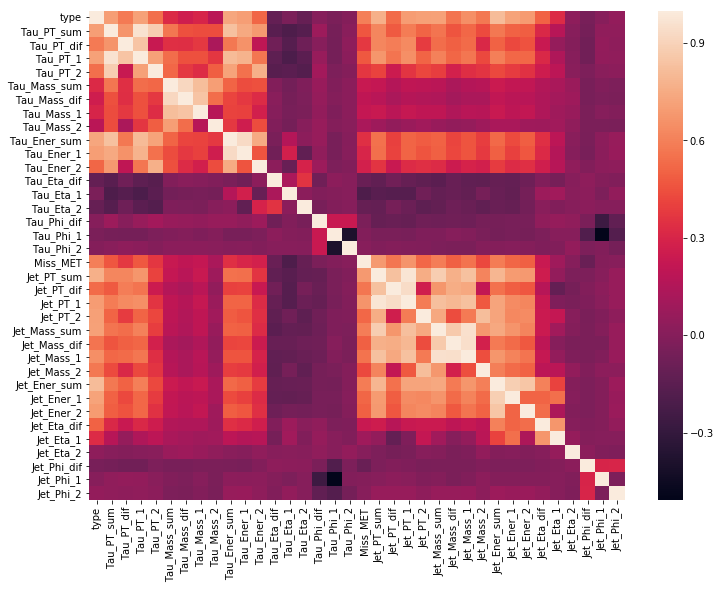

In [13]:
corrmat = train_test.corr()
f,ax =  plt.subplots(figsize=(12,9))
sb.heatmap(corrmat);

From the previous **heatmap**, first we can see that **Tau_Eta/Phi_1/2/dif** variables almost don't have any correlation with the other variables. 
Second, according to the *Vector Boson Fusion* Topology the **Jet_Eta_1/2/dif** variables should have great discrimination power, i.e. high correlation with type. However, it seems that these aren't the best ones at this stage (**Note: Jet_Eta_dif/1/2** have a great importance in the background clearing step, previous to this analysis). In contrast, other variables related with **Tranverse Momentum** could have better fit. 

Finally, as a result of the merging information process, there are a lot of group of variables that are highly correlated between them, e.g. **Jet_PT_sum/dif/1/2**, because they represent the same physical observable. 

Let's look more in deeper to check which are the most important features (high correlation with **type**).

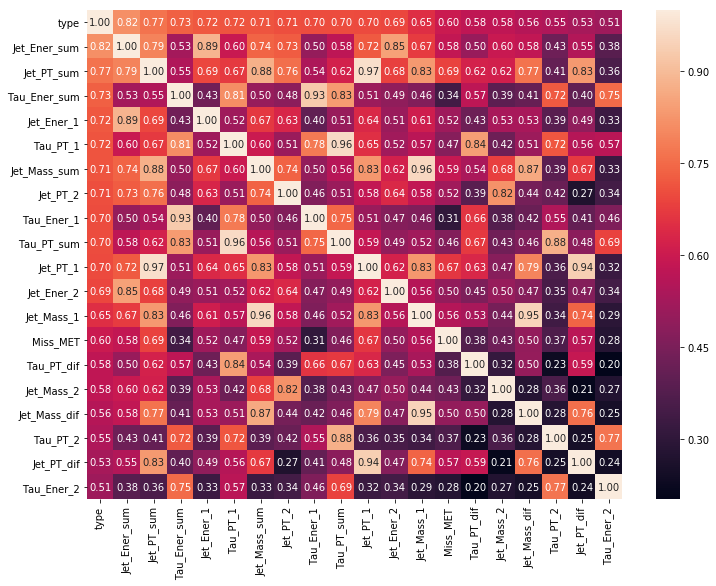

In [14]:
# Correlation matrix ordered by correlation with type

k = 20
f,ax =  plt.subplots(figsize=(12,9))
cols = corrmat.nlargest(k, 'type')['type'].index
cm = np.corrcoef(train_test[cols].values.T)
heatmap = sb.heatmap(cm,annot=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)

According to the previous ranking and avoiding *multicolinearity*, in each group of variables we can select the one with highest correlation with **type**:
    1. Jet_Ener_sum
    2. Jet_PT_sum
    3. Tau_PT_sum
    4. Jet_Mass_sum
    5. Tau_Ener_sum
    6. Miss_MET
    7. Jet_Eta_dif

In [15]:
X_train_test_selected = train_test[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
Y_train_test_selected = train_test['type']
train_test_selected = pd.concat([Y_train_test_selected,X_train_test_selected],axis=1)
train_test_selected.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.498033,1161.986179,263.812671,277.549951,33.692304,108.312076,541.619906,3.762435
std,0.500193,1100.178789,247.298727,301.033799,32.168810,124.022143,518.544438,1.510837
min,0.000000,20.304800,16.787700,17.386300,-0.000002,0.471265,21.659900,0.101081
25%,0.000000,164.696000,58.194650,60.592200,8.882990,25.655500,124.177000,2.741390
50%,0.000000,842.217000,175.939000,151.877000,20.919800,56.741100,368.326000,3.895270
75%,1.000000,1962.155000,437.256500,417.503000,50.960750,149.624500,839.467500,4.778855
max,1.000000,5498.690000,1272.920000,2530.560000,202.984000,711.082000,3179.850000,7.593740


### Separabilty of Data

To get a better approach to the data and how it is compound, it's possible to make a scatter plot across all variables. The idea is to know how would be the best function that can divide the data between **signal** and **background** events.

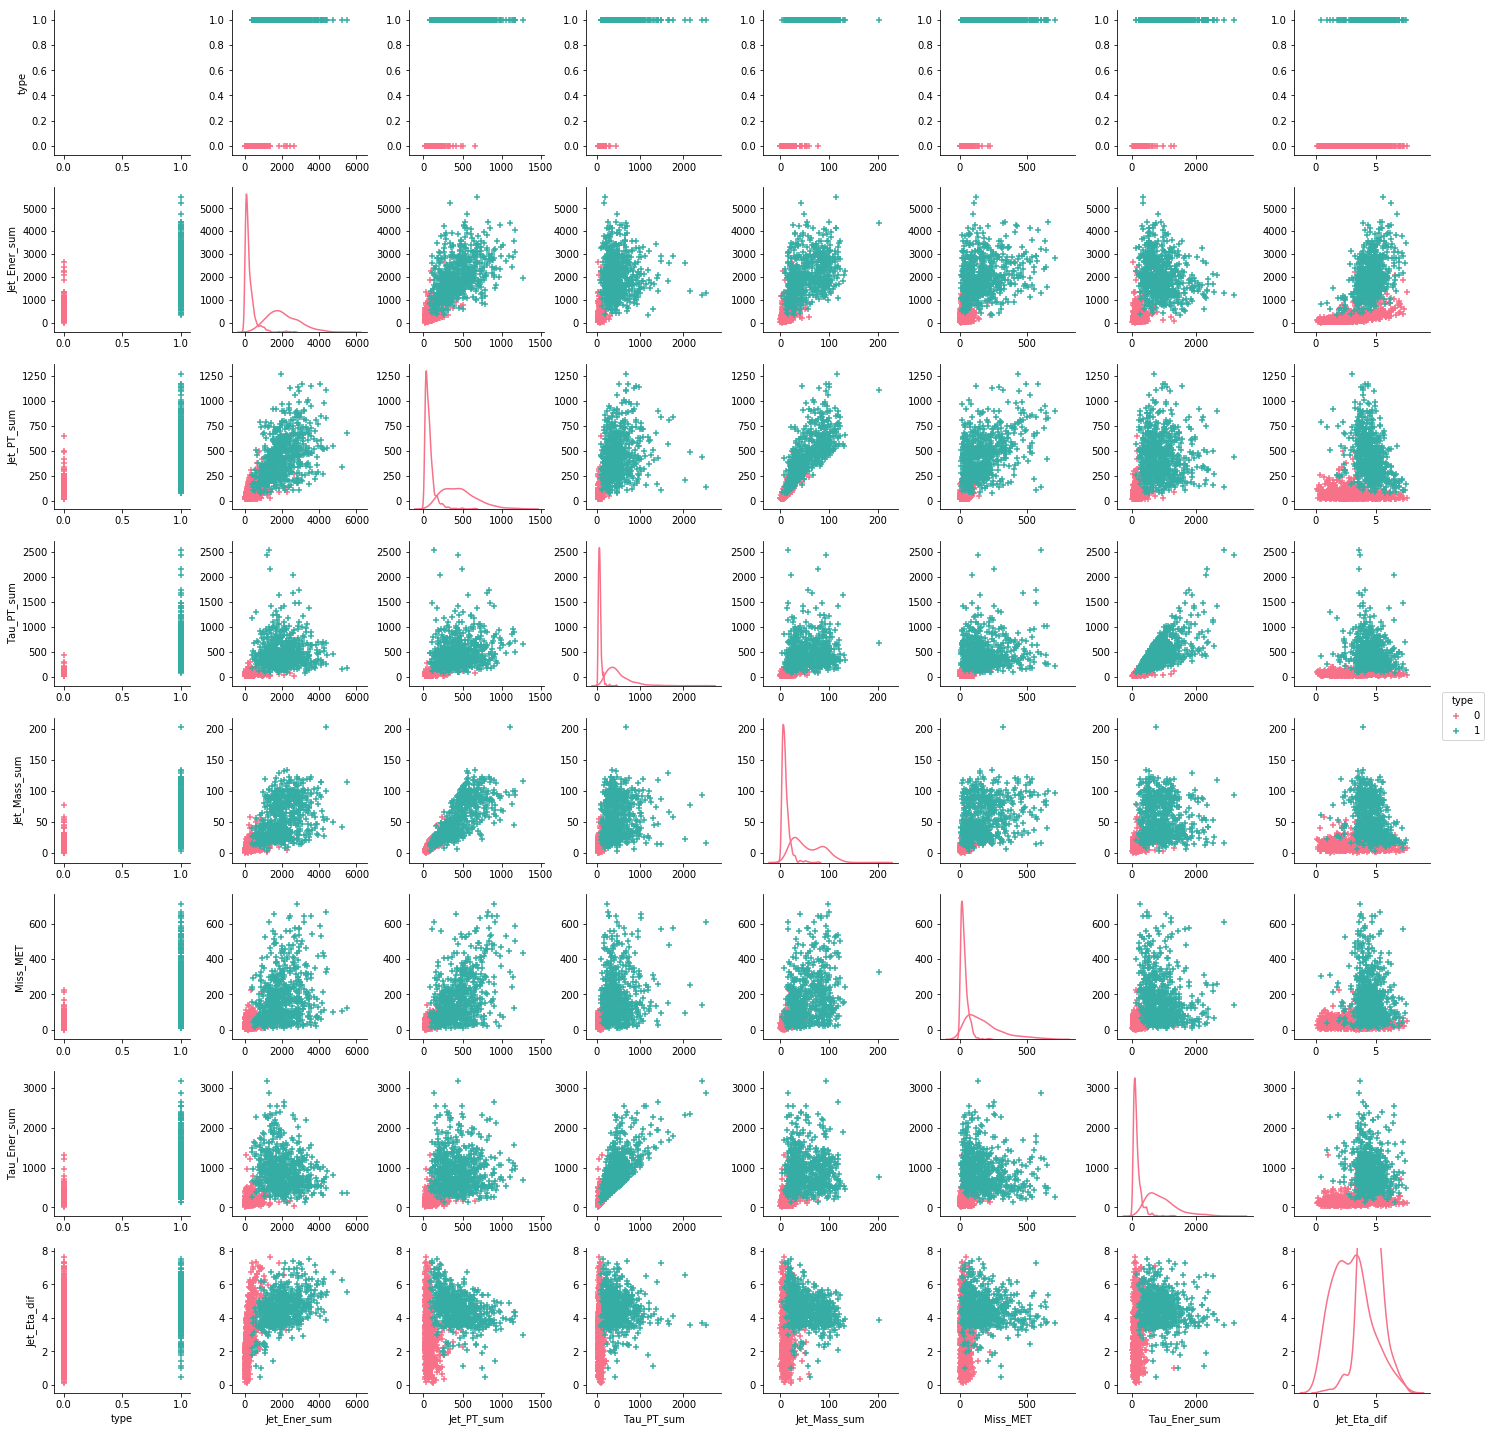

In [16]:
sb.pairplot(train_test_selected,hue='type',diag_kind='kde',palette='husl', markers='+');

The above graph shows that in some pair of variables it doesn't exist a linear function that can easily divide the data. Futhermore, as it's shown in the *Kernel distributions* plots over the diagonal, the background data is highly concentrated in some ranges. So to smoothe the variance of the data set over *type* of event, let's *log-transformated* the data (independent variables) in other to get a more comparable data by **type**.

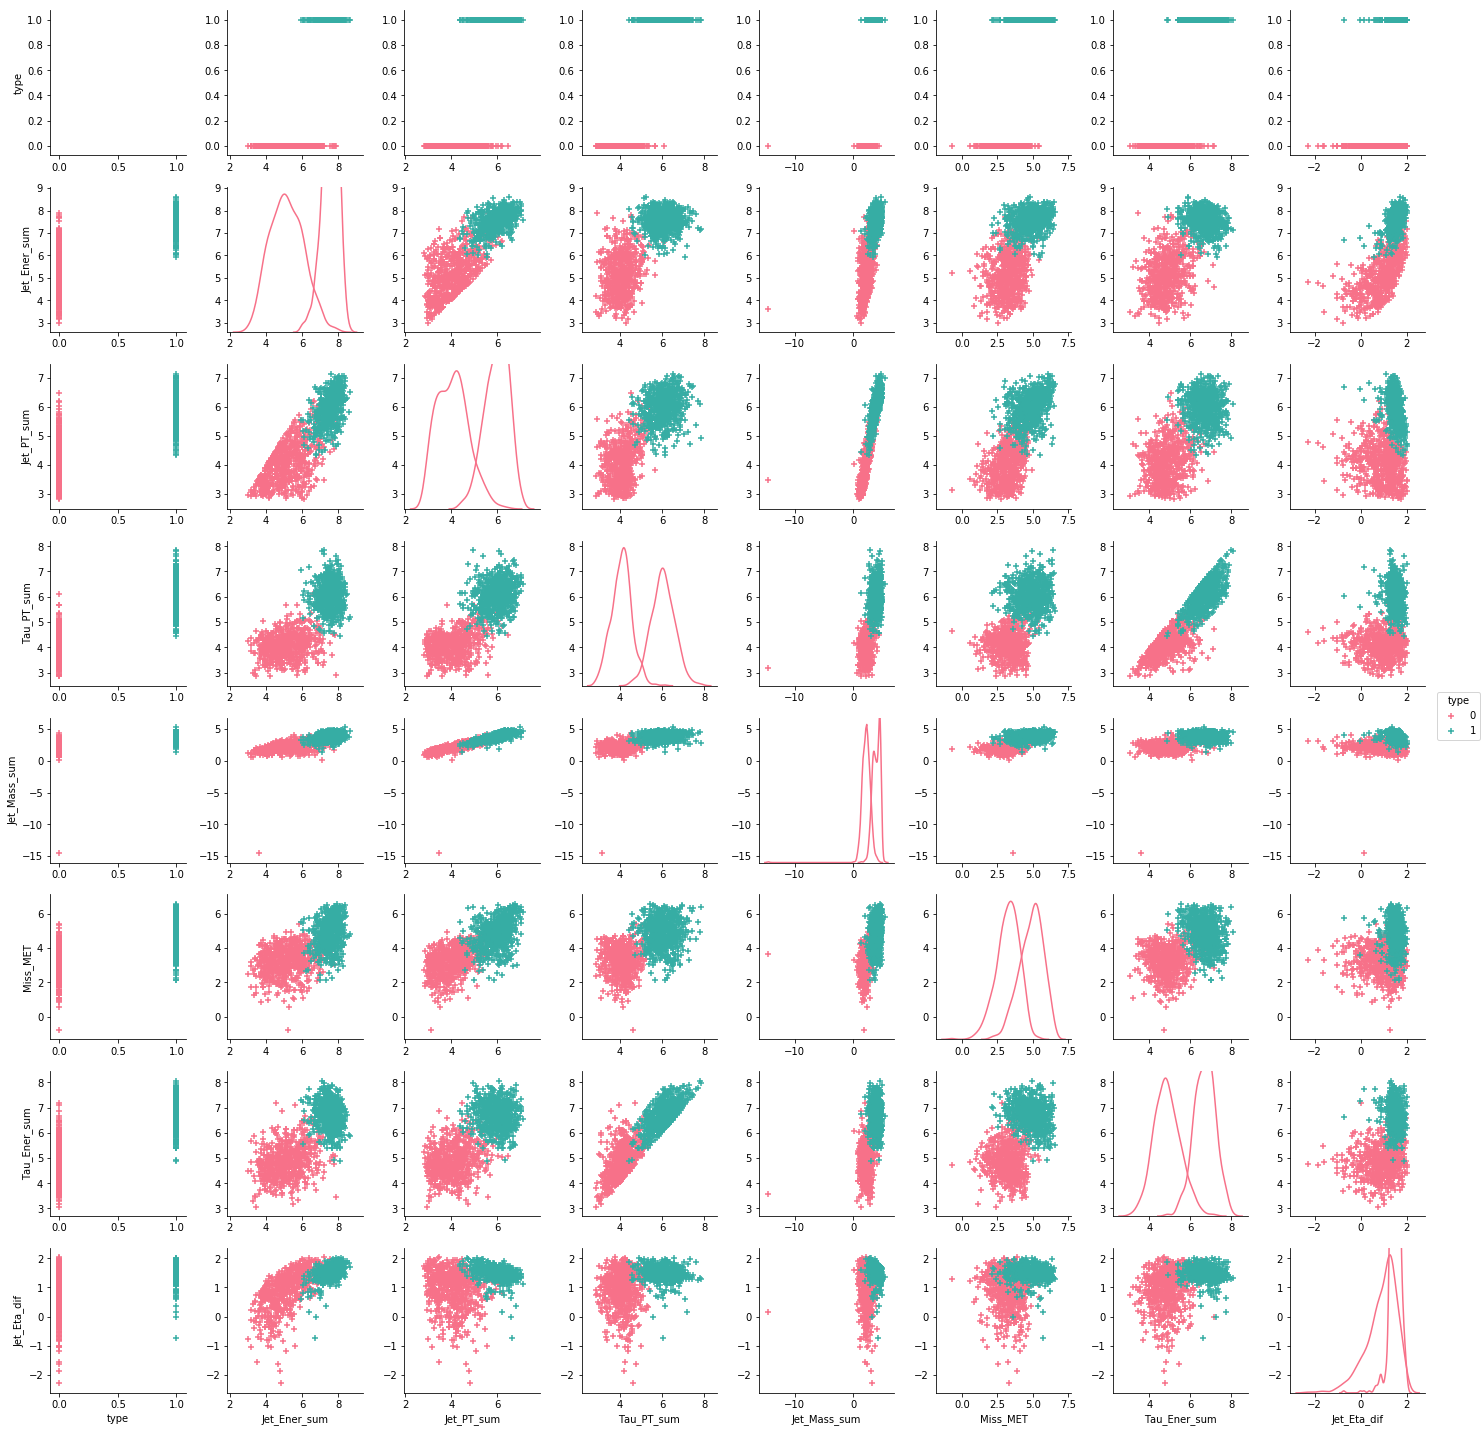

In [17]:
sb.pairplot(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),hue='type',diag_kind='kde',palette='husl',markers='+');

In this approach we can see a more clear separation than the previous figure, even it's possible to think that it would exist a linear function that can divide the data between **signal** and **background**

To confirm how have changed the data, let's see the empirical distributions before and after transformation.

In [18]:
def makeJoinHist(dataframe,varname):  
    leg =['1','0']
    fig, ax = plt.subplots()
    sb.distplot(dataframe[dataframe['type']==1][varname], ax = ax, label=r"$Z'\rightarrow \tau \tau$",color='b')
    sb.distplot(dataframe[dataframe['type']==0][varname], ax = ax, label='SM Background',color='r')
    fig.legend()

Text(0.5,1,u'Log-transformation')

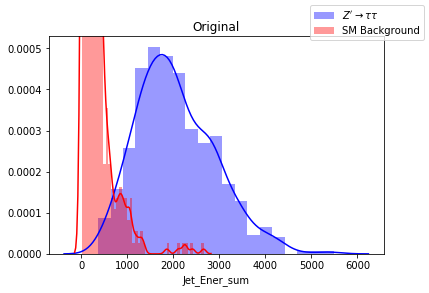

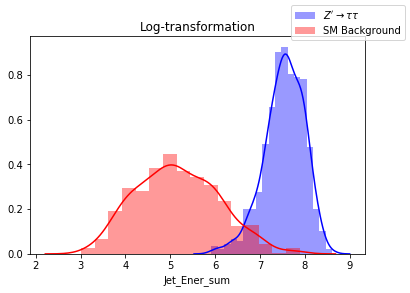

In [19]:
makeJoinHist(train_test_selected,'Jet_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

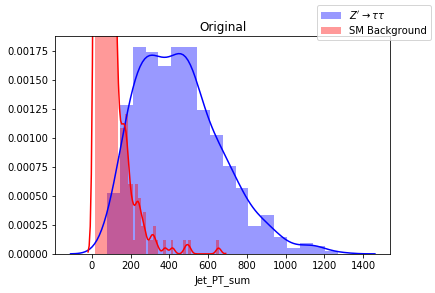

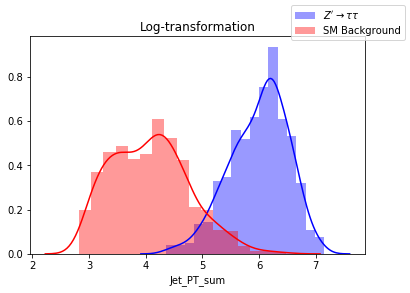

In [20]:
makeJoinHist(train_test_selected,'Jet_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

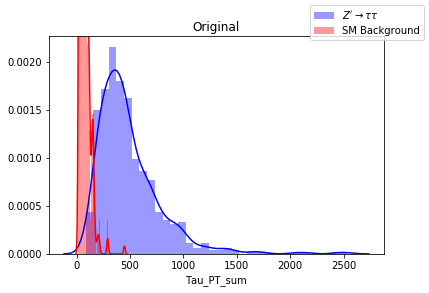

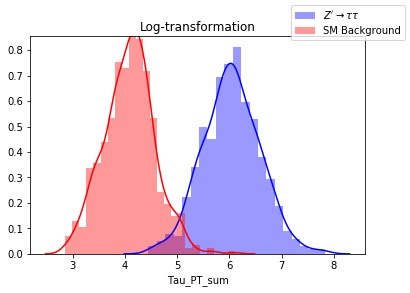

In [21]:
makeJoinHist(train_test_selected,'Tau_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_PT_sum')
plt.title("Log-transformation")

ValueError: cannot convert float NaN to integer

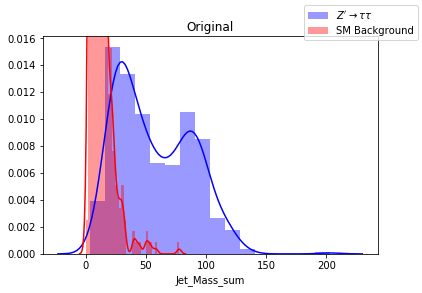

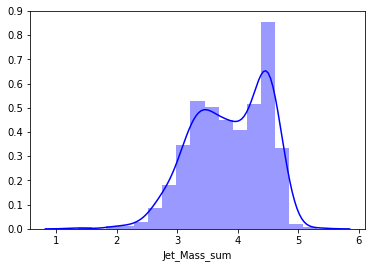

In [23]:
makeJoinHist(train_test_selected,'Jet_Mass_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Mass_sum')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(train_test_selected,'Miss_MET')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Miss_MET')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(train_test_selected,'Tau_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_Ener_sum')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(train_test_selected,'Jet_Eta_dif')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Eta_dif')
plt.title("Log-transformation")

All variables have a significant improvement in the discrimination between the distributions of each **type** of event, except **Jet_Eta_dif**. Despite this, we would take the log transformation of the whole ($X$ variables) selected data for simplicity. At the end, this would not affect our results.

In [28]:
X_log_train_test_selected = log(X_train_test_selected)
X_log_train_test_selected.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,6.263082,4.965788,4.921071,2.959415,3.926910,5.548680,1.169000
std,1.364620,1.081201,0.982832,1.077123,1.109532,0.932215,0.568452
min,2.958980,2.857521,2.855683,-14.497200,-0.581842,3.075463,-3.299948
25%,5.076089,4.010132,4.091123,2.136130,3.172867,4.782224,0.998569
50%,6.592436,5.131531,4.864229,2.979354,3.921159,5.661870,1.332150
75%,7.460945,5.950637,5.767882,3.757648,4.783689,6.280614,1.507368
max,8.545786,7.040606,7.149611,5.118658,6.551363,7.880706,2.073720


### Cross Validation Initialization

The data will be splitted between train and test samples in a $1:1$ relation

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_log_train_test_selected,Y_train_test_selected,test_size=.5)
X_train.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,6.206254,4.936143,4.880381,2.926625,3.919166,5.518486,1.157727
std,1.371072,1.082465,0.979669,1.126140,1.101143,0.921955,0.567447
min,3.088744,2.864763,2.855683,-14.497200,0.273456,3.242170,-3.299948
25%,5.001194,3.969682,4.069525,2.103031,3.150302,4.748495,0.975631
50%,6.496256,5.035601,4.748023,2.919952,3.902447,5.612416,1.324977
75%,7.393075,5.913294,5.737582,3.715251,4.751916,6.238466,1.499980
max,8.529724,7.040606,7.101907,5.118658,6.551363,7.752219,2.027324


#### Normalization

To introduce the data in the model, it must be normalized. So after we split the data, the first and second momentum of the distributions must be:

$$\mu = 0$$ and $$\sigma = 1$$

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

# Scale trainning set

X_scale_train = scaler.transform(X_train)
X_scale_train = pd.DataFrame(X_scale_train)
X_scale_train.columns = X_train.columns
Y_train.reset_index(drop=True, inplace=True)
scale_train = pd.concat([pd.DataFrame(Y_train),X_scale_train],axis=1)

# Scale test set 

X_scale_test = scaler.transform(X_test)
X_scale_test = pd.DataFrame(X_scale_test)
X_scale_test.columns = X_test.columns
Y_test.reset_index(drop=True, inplace=True)
scale_test = pd.concat([pd.DataFrame(Y_test),X_scale_test],axis=1)

# Scale the validation test 

X_validation_selected = X_validation[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
X_scale_validation = scaler.transform(log(X_validation_selected))

# Model Implementation

### Logistic Regression

The first model to implement supposse a linear separation of data.

In [31]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_scale_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
Y_pred_logReg = logReg.predict(X_scale_test)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logReg)
confusion_matrix_TT

array([[629,  16],
       [ 12, 707]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_logReg))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       645
          1       0.98      0.98      0.98       719

avg / total       0.98      0.98      0.98      1364



#### Cross validation set

In [35]:
Y_pred_logReg_validation = logReg.predict(X_scale_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logReg_validation)
confusion_matrix_V

array([[350,  11],
       [  7, 314]])

In [36]:
print(classification_report(Y_validation,Y_pred_logReg_validation))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       361
          1       0.97      0.98      0.97       321

avg / total       0.97      0.97      0.97       682



### Neural Network - MultiLayer Perceptron

The second model with higher complexity incorporate some non-linearities that could have a better fitting of the data.

In [37]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(7,5,3),max_iter=500)
clf.fit(X_scale_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
Y_pred_NN = clf.predict(X_scale_test)

In [39]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_NN)
confusion_matrix_TT

array([[626,  19],
       [ 11, 708]])

In [40]:
print(classification_report(Y_test,Y_pred_NN))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       645
          1       0.97      0.98      0.98       719

avg / total       0.98      0.98      0.98      1364



#### Cross validation set

In [41]:
Y_pred_NN_validation = clf.predict(X_scale_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_NN_validation)
confusion_matrix_V

array([[349,  12],
       [  6, 315]])

In [42]:
print(classification_report(Y_validation,Y_pred_NN_validation))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       361
          1       0.96      0.98      0.97       321

avg / total       0.97      0.97      0.97       682



### Support Vector Machine

The last model assumes a gaussian kernel to separate data

In [43]:
from sklearn import svm
svmodel = svm.SVC(C=25,kernel = 'rbf')
svmodel.fit(X_scale_train,Y_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
Y_pred_SVM = svmodel.predict(X_scale_test)

In [45]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_SVM)
confusion_matrix_TT

array([[628,  17],
       [  8, 711]])

In [46]:
print(classification_report(Y_test,Y_pred_SVM))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       645
          1       0.98      0.99      0.98       719

avg / total       0.98      0.98      0.98      1364



#### Cross validation set

In [47]:
Y_pred_SVM_validation = svmodel.predict(X_scale_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_SVM_validation)
confusion_matrix_V

array([[348,  13],
       [  7, 314]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation,Y_pred_SVM_validation))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       361
          1       0.96      0.98      0.97       321

avg / total       0.97      0.97      0.97       682



# Final model

Now, we want to choose the best model. Cause the three models get fairly the same high accuracy, the selection criteria will be to choose the simplest, i.e. Logistic regression. But, after we continue (just for fun), let's try to implement the model with the data that have the *log-transformation* but without normalitzation:

### Logistic regression without normalized data 

In [49]:
logRegWoN = LogisticRegression()
logRegWoN.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
Y_pred_logRegWoN = logRegWoN.predict(X_test)

In [51]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logRegWoN)
confusion_matrix_TT

array([[620,  25],
       [ 13, 706]])

In [52]:
print(classification_report(Y_test,Y_pred_logRegWoN))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       645
          1       0.97      0.98      0.97       719

avg / total       0.97      0.97      0.97      1364



### Cross validation set

In [53]:
Y_pred_logRegWoN_validation = logRegWoN.predict(log(X_validation_selected))
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logRegWoN_validation)
confusion_matrix_V

array([[343,  18],
       [ 10, 311]])

In [54]:
print(classification_report(Y_validation,Y_pred_logRegWoN_validation))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       361
          1       0.95      0.97      0.96       321

avg / total       0.96      0.96      0.96       682



Thanks to the *log-transformation* we could take the model without normalizing the data, and keep almost the same results.

# Significance 

In [55]:
# Import random sample from ROOT
fullSignal = pd.read_csv('fullSample/joined_signal_0p5TeV.root.csv')
fullSignal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,...,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000,366811.000000
mean,0.005962,72.101669,22.717651,47.409660,24.692009,4.236541,0.926906,2.581723,1.654817,143.870381,...,3.433315,238.694887,141.986429,96.708459,-0.000673,-0.002059,-0.001386,-0.003614,0.000241,0.003855
std,0.076985,36.468116,24.897371,28.213824,13.374657,4.121341,3.757020,3.559211,1.697747,101.753451,...,3.233954,286.316788,215.993515,170.083643,3.275835,1.617443,1.993529,2.628228,1.813874,1.814749
min,0.000000,16.530500,0.000000,8.396840,7.490200,-17.916000,-75.108600,-17.916000,-6.229470,19.674300,...,-0.000043,17.579000,8.593770,8.571300,-9.809600,-4.970320,-4.998190,-6.253210,-3.141560,-3.141590
25%,0.000000,50.861700,7.327860,31.432300,15.804500,2.156620,-0.631618,1.021015,0.805258,83.846550,...,1.766210,80.914950,37.985300,20.041150,-2.766920,-1.090405,-1.413350,-2.066780,-1.569310,-1.563720
50%,0.000000,66.284400,16.136900,41.763800,22.429900,3.225750,0.417771,1.694810,1.295710,114.255000,...,2.569070,146.061000,73.129300,40.570900,-0.130384,-0.003253,0.003935,-0.007900,0.000517,0.006555
75%,0.000000,84.262600,29.722850,55.134850,30.528900,4.863795,1.641715,2.849060,2.034965,170.805000,...,4.059920,281.354500,152.314000,97.402900,2.772070,1.085020,1.409500,2.061580,1.573440,1.576055
max,1.000000,1322.140000,1058.810000,1190.480000,464.071000,171.481000,168.880000,170.181000,85.082500,3209.550000,...,123.220000,6671.710000,5236.200000,4793.810000,9.590170,4.993710,5.001580,6.267820,3.141580,3.141580


In [56]:
fullSignal[fullSignal['Jet_Mass_sum']<=0].describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,111.000000,...,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.0,56.743502,12.737197,34.740357,22.003154,3.442388,0.658659,2.050523,1.391865e+00,122.667902,...,-7.348358e-07,132.925458,58.538197,74.387291,-0.227059,-0.105662,0.121397,0.028945,-0.023585,-0.052529
std,0.0,20.136382,9.212727,11.794853,10.298338,2.621244,2.539479,2.296038,1.178194e+00,70.273557,...,1.899722e-06,141.612742,74.673349,114.092037,3.683472,1.816069,2.246781,2.477260,1.869124,1.871547
min,0.0,18.661400,0.264389,9.534310,7.976600,-0.000002,-7.872630,-0.000002,-6.743500e-07,36.926500,...,-1.078960e-05,19.722600,8.974880,8.670990,-8.067780,-3.917130,-4.950130,-4.846720,-3.125330,-3.140470
25%,0.0,40.542050,4.773390,25.111950,13.917700,1.956030,-0.682921,0.926588,7.820065e-01,78.673800,...,-6.743500e-07,35.655650,14.000700,11.280100,-3.213245,-0.906467,-1.244575,-1.570000,-1.622330,-1.695390
50%,0.0,56.481500,12.200200,35.165200,19.879900,2.867650,0.313008,1.505440,1.233250e+00,102.999000,...,-1.192090e-07,82.068100,24.789600,19.715400,-0.220301,-0.021112,0.032265,-0.032732,0.099170,0.099077
75%,0.0,70.238850,19.850900,42.975750,28.691050,4.205710,1.403790,2.299830,1.806370e+00,148.711500,...,0.000000e+00,165.752000,70.956550,88.473800,2.779110,0.928274,1.335150,1.582930,1.768605,1.695535
max,0.0,118.310000,43.329300,69.900300,53.512400,18.059100,12.590300,15.324700,8.265130e+00,419.218000,...,3.814700e-06,624.792000,407.757000,523.821000,8.371290,3.800790,4.791310,5.647230,3.057230,3.100950


In [57]:
full_sample = fullSignal[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_sample = full_sample.abs()
full_sample_abs = full_sample[full_sample['Jet_Mass_sum']>0]

In [58]:
# Divide the data between dependent and independent variables

X_full_log_sample = log(full_sample_abs.drop(['type'],axis=1))
Y_full_sample = full_sample_abs['type']

In [59]:
Y_pred_logRegWoN_full = logRegWoN.predict(X_full_log_sample)

In [60]:
cross_section_signal = 10.1123675492 ## picoBarns
cross_section_backgr = 32000 # picoBarns
luminosity = 1000.0 # femtoBarns^-1
N = 1.0*Y_full_sample.count() # total # of events

In [61]:
n_s = 1.0*sum(Y_pred_logRegWoN_full)
efficiency = n_s/N
print "The Efficiency of signal detection is : ", efficiency*100, " %"
N_s = efficiency*cross_section_signal*luminosity*100
print "The expected number of signal events is: ", N_s

The Efficiency of signal detection is :  3.53486749018  %
The expected number of signal events is:  35745.8792984


In [62]:
n_b = N - n_s
efficiency = n_b/N
print "The Efficiency is : ", efficiency*100, " %"
N_b = efficiency*cross_section_backgr*luminosity*100
print "The expected number of signal events is: ", N_b

The Efficiency is :  96.4651325098  %
The expected number of signal events is:  3086884240.31


In [63]:
sigma = N_s/(N_s+N_b)**0.5
print "sigma : ", sigma

sigma :  0.643373691919
